<a href="https://colab.research.google.com/github/aditi980/Ai-FiR-generation/blob/main/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
import functools
import ipywidgets as widgets
from IPython.display import display, Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/movies2024.csv')


In [ ]:
df.head()

,MovieID,Title,Popularity,Overview,Genres,Actors,Directors,VoteAverage,ReleaseYear
0,533535,Deadpool & Wolverine,5948.017,A listless Wade Wilson toils away in civilian ...,"Action, Comedy, Science Fiction","Ryan Reynolds, Hugh Jackman, Emma Corrin, Matt...",Shawn Levy,7.763,2024.0
1,1022789,Inside Out 2,3128.461,Teenager Riley's mind headquarters is undergoi...,"Animation, Family, Adventure, Comedy","Amy Poehler, Maya Hawke, Kensington Tallman, L...",Kelsey Mann,7.678,2024.0
2,519182,Despicable Me 4,2384.852,"Gru and Lucy and their girls—Margo, Edith and ...","Animation, Family, Comedy, Action","Steve Carell, Kristen Wiig, Will Ferrell, Sofí...",Chris Renaud,7.297,2024.0
3,718821,Twisters,2251.448,"As storm season intensifies, the paths of form...","Action, Adventure, Drama, Thriller","Daisy Edgar-Jones, Glen Powell, Anthony Ramos,...",Lee Isaac Chung,7.039,2024.0
4,704239,The Union,1791.389,A New Jersey construction worker goes from reg...,"Action, Comedy","Mark Wahlberg, Halle Berry, J.K. Simmons, Mike...",Julian Farino,6.368,2024.0


In [ ]:
df.head(1)

,MovieID,Title,Popularity,Overview,Genres,Actors,Directors,VoteAverage,ReleaseYear
0,533535,Deadpool & Wolverine,5948.017,A listless Wade Wilson toils away in civilian ...,"Action, Comedy, Science Fiction","Ryan Reynolds, Hugh Jackman, Emma Corrin, Matt...",Shawn Levy,7.763,2024.0


In [ ]:
df.shape


(9000, 9)

In [ ]:
df.count()


,0
MovieID,9000
Title,9000
Popularity,9000
Overview,8934
Genres,8928
Actors,8906
Directors,8946
VoteAverage,9000
ReleaseYear,8968


In [ ]:
df.isnull().sum()
df.drop_duplicates(inplace=True)

In [ ]:
df[['Title','ReleaseYear']].duplicated().sum()
df.drop_duplicates(subset=['Title','ReleaseYear'],inplace=True)

In [ ]:
df.count()

,0
MovieID,7643
Title,7643
Popularity,7643
Overview,7587
Genres,7588
Actors,7577
Directors,7596
VoteAverage,7643
ReleaseYear,7614


In [ ]:
df.fillna('',inplace=True)
null_value=df[(df['Genres']=='') & (df['Overview']=='')].index
df.drop(null_value,inplace=True)

df.isnull().sum()

<ipython-input-77-0c5c67ac2a75>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('',inplace=True)


,0
MovieID,0
Title,0
Popularity,0
Overview,0
Genres,0
Actors,0
Directors,0
VoteAverage,0
ReleaseYear,0


Text(0.5, 1.0, 'Popular Movies')

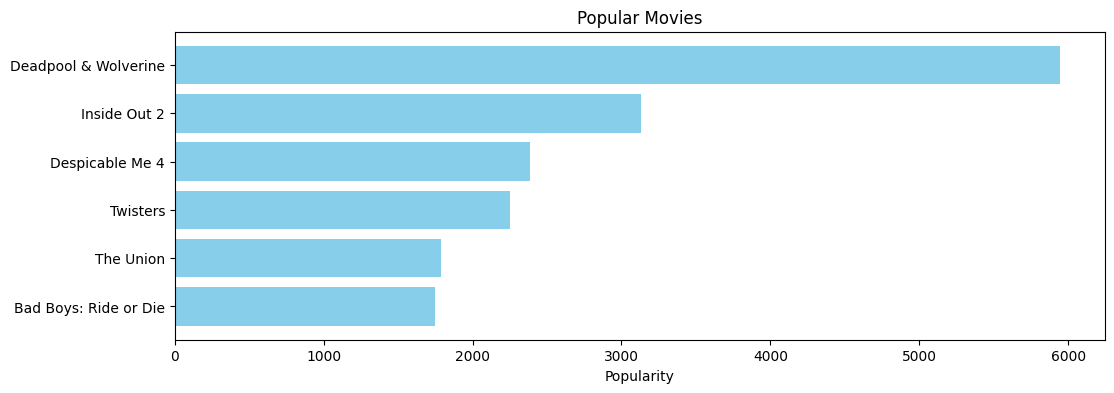

In [ ]:
pop= df.sort_values('Popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['Title'].head(6),pop['Popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Text(0.5, 1.0, 'vote count of few movies')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 38517 (\N{CJK UNIFIED IDEOGRAPH-9675}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24481 (\N{CJK UNIFIED IDEOGRAPH-5FA1}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 29483 (\N{CJK UNIFIED IDEOGRAPH-732B}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 29190 (\N{CJK UNIFIED IDEOGRAPH-7206}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph

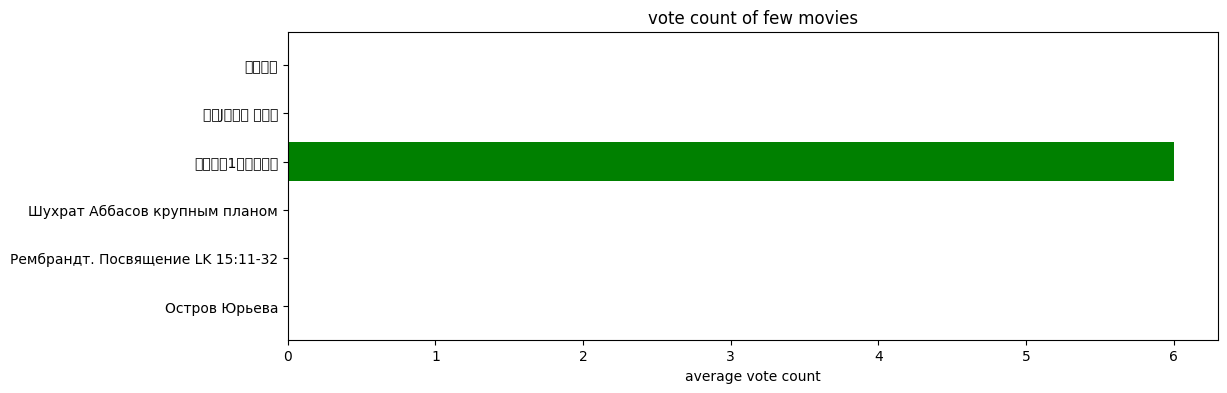

In [ ]:
pop= df.sort_values('Title', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.barh(pop['Title'].head(6),pop['VoteAverage'].head(6), align='center',color='green')
plt.gca().invert_yaxis()
plt.xlabel("average vote count")
plt.title("vote count of few movies")


In [ ]:
vote_mean=df['VoteAverage'].mean() #calculating mean value of the voting for a particular movie
vote_percentile=df['Popularity'].quantile(0.9) # calculating the percentile of vote obtained
vote_mean,vote_percentile


(np.float64(6.340238651272632), np.float64(70.15470000000002))

In [ ]:
def weighted_rating(x, vote_mean, vote_percentile):
    R = x['VoteAverage']
    v = x['Popularity']
    m = vote_percentile
    C = vote_mean
    return round((v / (v + m) * R) + (m / (v + m) * C), 2)

vote_mean = df['VoteAverage'].mean()
vote_percentile = df['Popularity'].quantile(0.90)

df['WeightedScore'] = df.apply(lambda x: weighted_rating(x, vote_mean, vote_percentile), axis=1)
top_weighted = df.sort_values('WeightedScore', ascending=False).head(10)


In [ ]:
df = df[df.Popularity>=30].reset_index()
df.shape

(3156, 11)

In [ ]:
df['score'] = df.apply(lambda x: weighted_rating(x, vote_mean, vote_percentile), axis=1)


In [ ]:
df['Genres']=df['Genres'].apply(lambda i:' '.join(i.split('-')))
df['overview']=df['Overview'].apply(lambda i:' '.join(i.split('-')))
df['Actors']=df['Actors'].apply(lambda i:' '.join(i.split('-')[:5]))
df['Directors']=df['Directors'].apply(lambda i:' '.join(i.split('-')))

In [ ]:
df['features']=df['Genres']+' '+ df['Overview']+' ' + df['Actors']+' '+df['Directors']
df['features'][3]

"Action, Adventure, Drama, Thriller As storm season intensifies, the paths of former storm chaser Kate Carter and reckless social-media superstar Tyler Owens collide when terrifying phenomena never seen before are unleashed. The pair and their competing teams find themselves squarely in the paths of multiple storm systems converging over central Oklahoma in the fight of their lives. Daisy Edgar Jones, Glen Powell, Anthony Ramos, Brandon Perea, Maura Tierney, Harry Hadden Paton, Sasha Lane, Daryl McCormack, Kiernan Shipka, Nik Dodani, David Corenswet, Tunde Adebimpe, Katy O'Brian, David Born, Paul Scheer, Laura Poe, Austin Bullock, Stephen Oyoung, Alex Kingi, Chris Adrien, Samantha Ireland, Aila Grey, Jeff Swearingen, James Paxton, Lily Smith, Randy Ballard, Ashley Moss, Mike Morgan, Emily Sutton, Julie Oliver Touchstone, Austin Brooks, Darryl Cox, Douglas Seok, Ben Snow, Ashley Jay Sandberg, Clay Edward Jones, Victoria Angelina Cruz, Ben Scott, Elizabeth Ann Townsend, Capri O'Neill, Li

In [ ]:
# remove noise
df['features']=df['features'].str.replace('[^\w\s]','')
df['features'][3]

"Action, Adventure, Drama, Thriller As storm season intensifies, the paths of former storm chaser Kate Carter and reckless social-media superstar Tyler Owens collide when terrifying phenomena never seen before are unleashed. The pair and their competing teams find themselves squarely in the paths of multiple storm systems converging over central Oklahoma in the fight of their lives. Daisy Edgar Jones, Glen Powell, Anthony Ramos, Brandon Perea, Maura Tierney, Harry Hadden Paton, Sasha Lane, Daryl McCormack, Kiernan Shipka, Nik Dodani, David Corenswet, Tunde Adebimpe, Katy O'Brian, David Born, Paul Scheer, Laura Poe, Austin Bullock, Stephen Oyoung, Alex Kingi, Chris Adrien, Samantha Ireland, Aila Grey, Jeff Swearingen, James Paxton, Lily Smith, Randy Ballard, Ashley Moss, Mike Morgan, Emily Sutton, Julie Oliver Touchstone, Austin Brooks, Darryl Cox, Douglas Seok, Ben Snow, Ashley Jay Sandberg, Clay Edward Jones, Victoria Angelina Cruz, Ben Scott, Elizabeth Ann Townsend, Capri O'Neill, Li

In [ ]:
tfidf=TfidfVectorizer(stop_words='english')
tfidf_vector=tfidf.fit_transform(df['features'])

print(tfidf_vector)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 316855 stored elements and shape (3156, 61633)>
  Coords	Values
  (0, 588)	0.027296146371196723
  (0, 11237)	0.03016181423255393
  (0, 48832)	0.038806004053470955
  (0, 18501)	0.03889072565270542
  (0, 32416)	0.11231763586486553
  (0, 58579)	0.14934638109276022
  (0, 59542)	0.045168136177587824
  (0, 55462)	0.11231763586486553
  (0, 3790)	0.06278214915303193
  (0, 10693)	0.10300982752385825
  (0, 32154)	0.0408712989684368
  (0, 13299)	0.06733402187985214
  (0, 37614)	0.11231763586486553
  (0, 18851)	0.11231763586486553
  (0, 36256)	0.09212038983708053
  (0, 13314)	0.09756510868046939
  (0, 24433)	0.11231763586486553
  (0, 17748)	0.0731368507171832
  (0, 17570)	0.10687291702147668
  (0, 55050)	0.07081010104876169
  (0, 45601)	0.07952099650022214
  (0, 53046)	0.09756510868046939
  (0, 45600)	0.09212038983708053
  (0, 59812)	0.11231763586486553
  (0, 47347)	0.08364715880253767
  :	:
  (3155, 20335)	0.07792452637428905
  (3155, 

In [ ]:
tfidf_vector.shape

(3156, 61633)

In [ ]:
!pip install surprise

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_sim = cosine_similarity(tfidf_vector, tfidf_vector)


In [ ]:
for col in df.select_dtypes(include='object'):
    df[col].fillna('', inplace=True)
for col in df.select_dtypes(include='number'):
    df[col].fillna(0, inplace=True)

<ipython-input-92-f0a68b5e9e89>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('', inplace=True)
<ipython-input-92-f0a68b5e9e89>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({co

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from functools import lru_cache

# Step 1: Load and Preprocess
df = pd.read_csv("/content/movies2024.csv")
df.fillna('', inplace=True)
df['features'] = df['Title'] + ' ' + df['Genres'] + ' ' + df['Overview'] + ' ' + df['Actors'] + ' ' + df['Directors']


# Step 2: Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(df['features'])

# Step 3: Hybrid Recommendation Function
@lru_cache(maxsize=None)
def hybrid_recommendations(title, n=5):
    title = title.lower()
    if title not in df['Title'].str.lower().values:
        return ["Movie not found."]

    movie_index = df[df['Title'].str.lower() == title].index[0]

    # Content-based filtering
    content_scores = list(enumerate(linear_kernel(tfidf_vector, tfidf_vector[movie_index])))
    content_scores = sorted(content_scores, key=lambda x: x[1], reverse=True)
    content_based_rec = [df['Title'].iloc[idx] for idx, _ in content_scores[1:n+1]]

    # Popularity-based recommendation (simulate collaborative filtering)
    popular_movies = df.sort_values(['VoteAverage', 'Popularity'], ascending=False)
    popular_rec = popular_movies[~popular_movies['Title'].isin(content_based_rec + [df['Title'].iloc[movie_index]])]
    popular_rec = popular_rec['Title'].head(n).tolist()

    # Combine and return
    return content_based_rec + popular_rec


<ipython-input-93-9138192fa59a>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


In [ ]:
movie_title = "It Ends with Us"
recommendations = hybrid_recommendations(movie_title, n=5)

print(" Hybrid Recommendations:")
for idx, movie in enumerate(recommendations, 1):
    print(f"{idx}. {movie}")


 Hybrid Recommendations:
1. Five Feet Apart
2. Five Feet Apart
3. Clouds
4. Coherence
5. Ghosts of Girlfriends Past
6. Crayon Shin-chan the Movie: Our Dinosaur Diary
7. Salome
8. Love Is in the Green Wind
9. The Glassworker
10. The Supremes at Earl's All-You-Can-Eat


In [ ]:
# Global variable to hold the selected random movie
random_movie = ""

# Output widget to show recommendations
recommendations_output = widgets.Output()

def display_recommendations(btn):
    global random_movie
    if not random_movie:
        return

    n_recommendations = 6
    hybrid_rec = hybrid_recommendations(random_movie, n=n_recommendations)

    recommendations_output.clear_output()
    with recommendations_output:
        print(f"🍿 Recommendations for: {random_movie}\n")
        for idx, movie in enumerate(hybrid_rec, start=1):
            print(f"{idx}. {movie}")

def random_movie_button_click(btn):
    global random_movie
    movie_titles = df['Title'].dropna().unique()
    random_movie = np.random.choice(movie_titles)

    recommendations_output.clear_output()
    with recommendations_output:
        print(f"🎬 Selected Random Movie:\n{random_movie}")

# Buttons
random_movie_button = widgets.Button(description="🎲 Pick Random Movie")
recommend_button = widgets.Button(description="🎯 Get Recommendations")

# Event bindings
random_movie_button.on_click(random_movie_button_click)
recommend_button.on_click(display_recommendations)

# UI Display
intro_text = widgets.HTML("<h2>🎥 Welcome to the Movie Recommender!</h2>")
random_movie_text = widgets.HTML("<p>Click below to get started with a random movie and its recommendations.</p>")

# Display the whole interactive layout
display(intro_text, random_movie_text, random_movie_button, recommendations_output, recommend_button)


HTML(value='<h2>🎥 Welcome to the Movie Recommender!</h2>')

HTML(value='<p>Click below to get started with a random movie and its recommendations.</p>')

Button(description='🎲 Pick Random Movie', style=ButtonStyle())

Output()

Button(description='🎯 Get Recommendations', style=ButtonStyle())